In [1]:
import numpy as np
import matplotlib.pyplot as plt

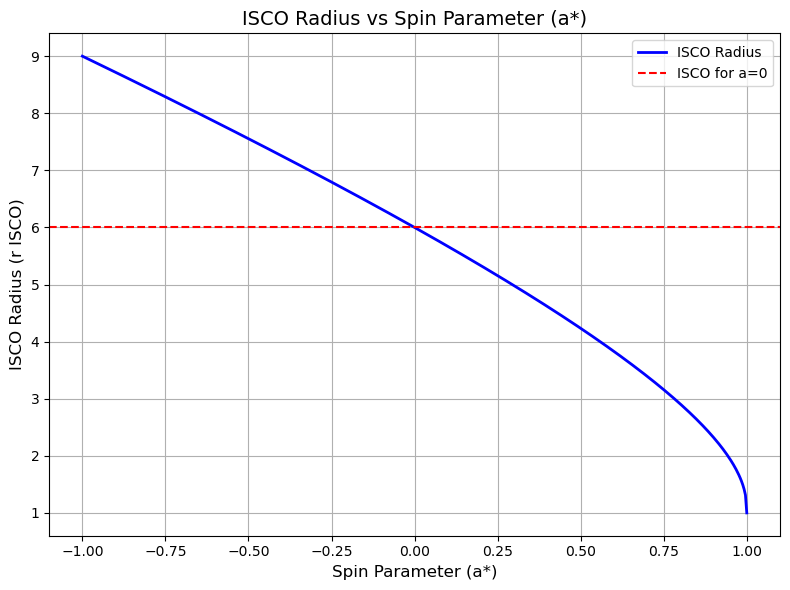

In [2]:
# 计算ISCO半径的函数
def isco_radius(a):
    """
    计算Kerr黑洞的ISCO半径。
    a: 黑洞的自旋参数，取值范围 -1 <= a <= 1
    返回：ISCO半径
    """
    # 计算Z1和Z2
    z1 = 1 + (1 - a**2)**(1/3)*((1+a)**(1/3)+(1-a)**(1/3))
    z2 = (3*a**2+z1**2)**0.5
    # 计算ISCO半径
    temp = ((3-z1)*(3+z1+2*z2))**0.5
    if a >= 0:
        return 3+z2-temp
    else:
        return 3+z2+temp

# 自旋参数范围
a_values = np.linspace(-1, 1, 500)

# 计算不同自旋值下的ISCO半径
r_isco_values = np.array([isco_radius(a) for a in a_values])  # 使用列表推导式计算


# 绘图
plt.figure(figsize=(8, 6))
plt.plot(a_values, r_isco_values, label='ISCO Radius', color='b', lw=2)
plt.axhline(y=6, color='r', linestyle='--', label='ISCO for a=0')  # For a=0, ISCO is 6
plt.title('ISCO Radius vs Spin Parameter (a*)', fontsize=14)
plt.xlabel('Spin Parameter (a*)', fontsize=12)
plt.ylabel('ISCO Radius (r ISCO)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# 显示图像
plt.show()


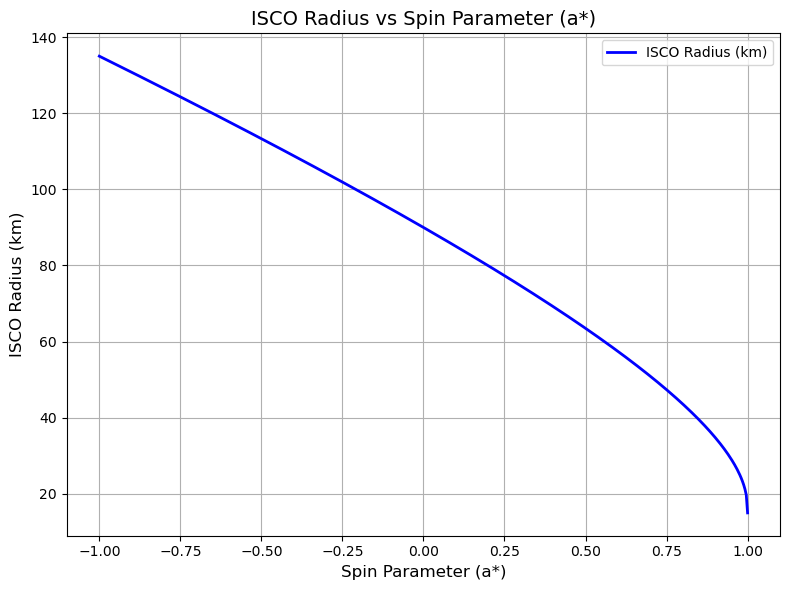

In [3]:
def r_trans(isco,m):
    km = (m/10)*isco*15
    return km

# 自旋参数范围
a_array = np.linspace(-1, 1, 500)

# 黑洞质量（单位：10倍太阳质量）
m = 10

# 计算不同自旋值下的ISCO半径（单位为公里）
rg = np.array([isco_radius(a) for a in a_array])

# 计算转换后的ISCO半径（单位：千米）
risco = np.array([r_trans(r, m) for r in rg])

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(a_array, risco, label='ISCO Radius (km)', color='b', lw=2)
plt.title('ISCO Radius vs Spin Parameter (a*)', fontsize=14)
plt.xlabel('Spin Parameter (a*)', fontsize=12)
plt.ylabel('ISCO Radius (km)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# 显示图像
plt.show()


In [9]:
a = 0.9
m = 40
rg = isco_radius(a)
# 计算转换后的ISCO半径（单位：千米）
risco = r_trans(rg, m)
print(risco)

139.25298250571322


In [19]:
def norm(D,f,i,n):
    rin = np.sqrt((n/np.cos(i/180*np.pi))*f**4*D**2)
    return rin

In [20]:
D = 10
f = 1.7
i = 40.0
n  = 1000
rin = norm(D,f,i,n)
print(rin)

1044.1691539799538


In [31]:
import numpy as np

def calc_rin(a, M, M_sun=1.989e30):
    # 计算 Schwarzschild 单位的 r_in
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3 * a**2 + Z1**2)
        # 计算ISCO半径
    temp = ((3-Z1)*(3+Z1+2*Z2))**0.5
    if a >= 0:
        rin_schwarzschild = 3+Z2-temp
    else:
        rin_schwarzschild = 3+Z2+temp
    
    # 转换为 km
    G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
    c = 3.0e8        # 光速 (m/s)
    
    # Schwarzschild 单位转换，考虑黑洞质量
    rin_km = rin_schwarzschild * (G * M * M_sun / c**2) * 1e-3  # 单位: km
    return rin_km

a = 0.9
M = 40  # 黑洞质量是 10 倍太阳质量
rin_km = calc_rin(a, M)
print(f"吸积盘内半径 r_in: {rin_km:.2f} km")

吸积盘内半径 r_in: 136.93 km


In [ ]:
def e_isco(a):
    r = isco(a)
    temp = a*r**-1.5
    return (1-2/r+temp)*(1-3/r+2*temp)**-0.5

def cal_Ledd(a,mdd):
    epsilon = mdd*(1-e_isco(a))
    return epsilon

def isco(a):
    z1 = 1 + (1 - a**2)**(1/3)*((1+a)**(1/3)+(1-a)**(1/3))
    z2 = (3*a**2+z1**2)**0.5
    temp = ((3-z1)*(3+z1+2*z2))**0.5
    if a >= 0:
        return 3+z2-temp
    else:
        return 3+z2+temp